[Original author](https://designwith.ml/assets/docs/Meetup_clustering_sample)  
  
Clustering meetup.com data! Using the location and group information to cluster the members into 6 clusters - but it is up to you to figure out what they mean!  

Data was on Kaggle.

In [11]:
#these are all of the libraries i'll be using - and I load the groups.csv data
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [12]:
import pandas as pd

df = pd.read_csv(r"C:\Users\danpo\OneDrive\Master\Anul 2\Curs ML\ubb-sociology-ml\lecture5\data\groups.csv")

# Data Step
This step we're going to look at our dataframes and become familiar with what's in them.

In [13]:
#this is what the groups.csv looks like as a dataframe - it is about the groups
df.head()

group_id  category_id          category.name     category.shortname  \
0      6388           14       health/wellbeing       health-wellbeing   
1      6510            4  community/environment  community-environment   
2      8458           26           pets/animals           pets-animals   
3      8940           29         sci-fi/fantasy         sci-fi-fantasy   
4     10104           26           pets/animals           pets-animals   

   city_id      city country              created  \
0    10001  New York      US  2002-11-21 16:50:46   
1    10001  New York      US  2003-05-20 14:48:54   
2    10001  New York      US  2004-03-27 09:55:41   
3    10001  New York      US  2002-11-16 04:49:16   
4    10001  New York      US  2003-10-22 21:39:49   

                                         description  \
0  Those who practice or hold a strong interest i...   
1  The New York Alternative Energy Meetupis for t...   
2                                          not_found   
3  Welcome to the The New York City Anime Meetup ...   
4  We welcome those who support pits, even if you...   

              group_photo.base_url  ...  \
0  https://secure.meetupstatic.com  ...   
1  https://secure.meetupstatic.com  ...   
2  https://secure.meetupstatic.com  ...   
3  https://secure.meetupstatic.com  ...   
4  https://secure.meetupstatic.com  ...   

                          organizer.photo.photo_link  \
0  https://secure.meetupstatic.com/photos/member/...   
1  https://secure.meetupstatic.com/photos/member/...   
2  https://secure.meetupstatic.com/photos/member/...   
3  https://secure.meetupstatic.com/photos/member/...   
4  https://secure.meetupstatic.com/photos/member/...   

                          organizer.photo.thumb_link organizer.photo.type  \
0  https://secure.meetupstatic.com/photos/member/...               member   
1  https://secure.meetupstatic.com/photos/member/...               member   
2  https://secure.meetupstatic.com/photos/member/...               member   
3  https://secure.meetupstatic.com/photos/member/...               member   
4  https://secure.meetupstatic.com/photos/member/...               member   

  rating state    timezone                    urlname utc_offset  \
0   4.39    NY  US/Eastern     alternative-health-nyc     -14400   
1   4.31    NY  US/Eastern  alternative-energy-meetup     -14400   
2   4.84    NY  US/Eastern                    Animals     -14400   
3   4.46    NY  US/Eastern                  NYC-Anime     -14400   
4   4.09    NY  US/Eastern                NYC-Pitbull     -14400   

       visibility                            who  
0          public            Explorers of Health  
1          public        Clean Energy Supporters  
2          public                  Animal Voices  
3          public                     Anime Fans  
4  public_limited  NYC Pits & People, Dog Lovers  

[5 rows x 36 columns]

In [14]:
#this is the df about the members
df2 = pd.read_csv(r"C:\Users\danpo\OneDrive\Master\Anul 2\Curs ML\ubb-sociology-ml\lecture5\data\members.csv", encoding = "ISO-8859-1" , nrows=1600133) #  This encoding is commonly used for Western European languages and is a single-byte encoding that can represent a wide range of characters, including characters with accents and diacritics.

In [15]:
df2.shape

(1600133, 14)

In [16]:
df2.head()

member_id                                                bio      city  \
0          3                                          not_found  New York   
1          3                                          not_found  New York   
2          3  Hi, I'm Matt. I'm an entrepreneur who has star...  New York   
3          3  Hi, I'm Matt. I'm an entrepreneur who has star...  New York   
4          3  Hi, I'm Matt. I'm an entrepreneur who has star...  New York   

  country      hometown               joined    lat  \
0      us  New York, NY  2007-05-01 22:04:37  40.72   
1      us  New York, NY  2011-01-23 14:13:17  40.72   
2      us  New York, NY  2010-12-30 18:47:34  40.72   
3      us  New York, NY  2011-01-03 14:45:21  40.72   
4      us  New York, NY  2010-12-30 18:34:50  40.72   

                              link   lon  member_name state member_status  \
0  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   
1  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   
2  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   
3  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   
4  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   

               visited  group_id  
0  2009-09-18 18:32:23    490552  
1  2011-03-20 01:02:11   1474611  
2  2011-01-18 20:37:23   1490492  
3  2011-07-23 03:42:28   1515830  
4  2011-06-13 18:33:23   1574965

## Data Cleaning Phase
In this phase, we'll sample a % of the data, and then use "one hot" encoding to turn string features into numbers for our mathematical models.

In [17]:
# I am sampling to 5,000 random samples from the dataframe since it is just SOOO big! This will help my code run faster
df2_sample = df2.sample(n=5000)

In [18]:
#let's explore the df by member id and the first record number of each - what are the features we want to use?
# group a DataFrame (df2_sample) by the 'member_id' column and then select the first row within each group.
# This operation is often used to get the first entry or a representative entry for each unique member ID.
df2_sample.groupby(['member_id']).first()

bio           city  \
member_id                                                                     
1230                                               not_found  San Francisco   
29009                                              not_found  San Francisco   
55921                                              not_found        Chicago   
78756                                              not_found       New York   
107055                                             not_found  San Francisco   
...                                                      ...            ...   
48370762                                           not_found       New York   
48441022                   i am from Buenos Aires, Argentina       New York   
48457672   New to the area and looking to explore all tha...  San Francisco   
48467982                                           not_found  San Francisco   
48513952                                           not_found  San Francisco   

          country        hometown               joined    lat  \
member_id                                                       
1230           us   San Francisco  2016-08-07 03:36:59  37.78   
29009          us  Washington, DC  2017-03-24 20:04:33  37.79   
55921          us       not_found  2015-06-10 04:30:43  42.01   
78756          us        new york  2015-05-17 15:19:45  40.78   
107055         us  Chicago suburb  2013-09-30 09:47:55  37.74   
...           ...             ...                  ...    ...   
48370762       us       not_found  2013-09-04 13:41:53  40.76   
48441022       us       not_found  2012-05-19 22:52:02  40.72   
48457672       us       not_found  2012-06-30 18:28:22  37.74   
48467982       us       not_found  2016-10-16 04:21:13  37.77   
48513952       us         Oakland  2012-11-02 20:11:43  37.77   

                                             link     lon         member_name  \
member_id                                                                       
1230           http://www.meetup.com/members/1230 -122.46         ryan nelson   
29009         http://www.meetup.com/members/29009 -122.42        Andrew Etter   
55921         http://www.meetup.com/members/55921  -87.67       Bethany Crome   
78756         http://www.meetup.com/members/78756  -73.98                joey   
107055       http://www.meetup.com/members/107055 -122.44             Shawn B   
...                                           ...     ...                 ...   
48370762   http://www.meetup.com/members/48370762  -73.97       Saumil Ambani   
48441022   http://www.meetup.com/members/48441022  -74.00  matias Bedacarratz   
48457672   http://www.meetup.com/members/48457672 -122.49     Andrew Picciano   
48467982   http://www.meetup.com/members/48467982 -122.44           April Ann   
48513952   http://www.meetup.com/members/48513952 -122.44               Wolfe   

          state member_status              visited  group_id  
member_id                                                     
1230         CA        active  2016-12-06 00:20:04   9546582  
29009        CA        active  2017-03-24 20:04:33  19106419  
55921        IL        active  2017-09-28 19:34:18   1741214  
78756        NY        active  2015-05-17 15:19:45   7704812  
107055       CA        active  2016-07-15 22:43:27    220424  
...         ...           ...                  ...       ...  
48370762     NY        active  2013-12-09 12:30:34   6737712  
48441022     NY        active  2012-05-27 15:16:32   1377720  
48457672     CA        active  2012-06-30 18:28:22   1569779  
48467982     CA        active  2016-10-23 06:19:57  11270332  
48513952     CA        active  2012-11-02 20:11:43    328570  

[4748 rows x 13 columns]

df2_sample['group_id']: This extracts the 'group_id' column from the DataFrame df2_sample.  
pd.get_dummies(...): This function converts categorical variable(s) into dummy/indicator variables. In this case, it's applied to the 'group_id' column.  
prefix='group_id': This parameter adds a prefix to the newly created dummy variable columns to indicate their association with the original 'group_id'.  
  
  The resulting df2_sample_dummies DataFrame will contain new binary columns (0 or 1) for each unique value in the 'group_id' column. Each row will have a 1 in the column corresponding to its 'group_id' and 0s in the other columns.

In [19]:
#One feature I want to use is the GROUP ID - one thing that we can do is "get dummies" or "one-hot encoding" to
#turn string variables into numbers! look at it below
df2_sample_dummies = pd.get_dummies(df2_sample['group_id'], prefix = 'group_id')

In [20]:
#this is what it looks like to have "dummies" or one-hot encoded variables!
df2_sample_dummies.head()

group_id_6388  group_id_6510  group_id_8458  group_id_8940  \
605934           False          False          False          False   
828827           False          False          False          False   
519708           False          False          False          False   
65348            False          False          False          False   
1097394          False          False          False          False   

         group_id_12542  group_id_12907  group_id_14573  group_id_15324  \
605934            False           False           False           False   
828827            False           False           False           False   
519708            False           False           False           False   
65348             False           False           False           False   
1097394           False           False           False           False   

         group_id_17921  group_id_22211  ...  group_id_26095751  \
605934            False           False  ...              False   
828827            False           False  ...              False   
519708            False           False  ...              False   
65348             False           False  ...              False   
1097394           False           False  ...              False   

         group_id_26152610  group_id_26163512  group_id_26175156  \
605934               False              False              False   
828827               False              False              False   
519708               False              False              False   
65348                False              False              False   
1097394              False              False              False   

         group_id_26187030  group_id_26210160  group_id_26241640  \
605934               False              False              False   
828827               False              False              False   
519708               False              False              False   
65348                False              False              False   
1097394              False              False              False   

         group_id_26292937  group_id_26315851  group_id_26361954  
605934               False              False              False  
828827               False              False              False  
519708               False              False              False  
65348                False              False              False  
1097394              False              False              False  

[5 rows x 2711 columns]

In [21]:
#Let's combine it back to our original dataframe
df2_sample_dummies_concat = pd.concat([df2_sample, df2_sample_dummies], axis=1)

In [22]:
df2_sample_dummies_concat.head()

member_id        bio           city country      hometown  \
605934     9683460  not_found       New York      us         Miami   
828827    11901097  not_found  San Francisco      us  Hangtown, CA   
519708     8789174  not_found        Chicago      us     not_found   
65348      2176350  not_found  San Francisco      us     not_found   
1097394   14108523  not_found       New York      us     not_found   

                      joined    lat                                    link  \
605934   2017-04-17 07:50:44  40.83   http://www.meetup.com/members/9683460   
828827   2010-04-15 17:47:41  37.75  http://www.meetup.com/members/11901097   
519708   2016-12-03 04:19:09  41.89   http://www.meetup.com/members/8789174   
65348    2016-01-08 06:34:53  37.72   http://www.meetup.com/members/2176350   
1097394  2016-07-30 14:51:07  40.75  http://www.meetup.com/members/14108523   

            lon           member_name  ... group_id_26095751  \
605934   -73.94  Shannon Clarke, Esq.  ...             False   
828827  -122.42          Scott Lepich  ...             False   
519708   -87.63                Kat =)  ...             False   
65348   -122.41     Jonathan El-Bizri  ...             False   
1097394  -73.99          Ken Nakagama  ...             False   

        group_id_26152610 group_id_26163512  group_id_26175156  \
605934              False             False              False   
828827              False             False              False   
519708              False             False              False   
65348               False             False              False   
1097394             False             False              False   

         group_id_26187030  group_id_26210160  group_id_26241640  \
605934               False              False              False   
828827               False              False              False   
519708               False              False              False   
65348                False              False              False   
1097394              False              False              False   

         group_id_26292937  group_id_26315851  group_id_26361954  
605934               False              False              False  
828827               False              False              False  
519708               False              False              False  
65348                False              False              False  
1097394              False              False              False  

[5 rows x 2725 columns]

In [23]:
#let's repeat the same process for the "cities" feature
df2_sample_dummies_cities = pd.get_dummies(df2_sample_dummies_concat['city'], prefix = 'cities_')
df2_sample_dummies_concat_cities2 = pd.concat([df2_sample_dummies_concat, df2_sample_dummies_cities], axis=1)

In [24]:
df2_sample_dummies_concat_cities2.head()

member_id        bio           city country      hometown  \
605934     9683460  not_found       New York      us         Miami   
828827    11901097  not_found  San Francisco      us  Hangtown, CA   
519708     8789174  not_found        Chicago      us     not_found   
65348      2176350  not_found  San Francisco      us     not_found   
1097394   14108523  not_found       New York      us     not_found   

                      joined    lat                                    link  \
605934   2017-04-17 07:50:44  40.83   http://www.meetup.com/members/9683460   
828827   2010-04-15 17:47:41  37.75  http://www.meetup.com/members/11901097   
519708   2016-12-03 04:19:09  41.89   http://www.meetup.com/members/8789174   
65348    2016-01-08 06:34:53  37.72   http://www.meetup.com/members/2176350   
1097394  2016-07-30 14:51:07  40.75  http://www.meetup.com/members/14108523   

            lon           member_name  ... group_id_26241640  \
605934   -73.94  Shannon Clarke, Esq.  ...             False   
828827  -122.42          Scott Lepich  ...             False   
519708   -87.63                Kat =)  ...             False   
65348   -122.41     Jonathan El-Bizri  ...             False   
1097394  -73.99          Ken Nakagama  ...             False   

        group_id_26292937 group_id_26315851  group_id_26361954  \
605934              False             False              False   
828827              False             False              False   
519708              False             False              False   
65348               False             False              False   
1097394             False             False              False   

         cities__Chicago  cities__Chicago Ridge  cities__New York  \
605934             False                  False              True   
828827             False                  False             False   
519708              True                  False             False   
65348              False                  False             False   
1097394            False                  False              True   

         cities__San Francisco  cities__South San Francisco  \
605934                   False                        False   
828827                    True                        False   
519708                   False                        False   
65348                     True                        False   
1097394                  False                        False   

         cities__West New York  
605934                   False  
828827                   False  
519708                   False  
65348                    False  
1097394                  False  

[5 rows x 2731 columns]

In [25]:
#write it to a CSV before your kernel dies! this could be helpful if you want to use the same sample again in the future
df2_sample_dummies_concat_cities2.to_csv('members2.csv')

In [47]:
copy members2.csv r"C:\Users\danpo\OneDrive\Master\Anul 2\Curs ML\ubb-sociology-ml\lecture5\data"

        0 file(s) copied.


The filename, directory name, or volume label syntax is incorrect.


## Training the model
We will use groupIDs and Cities as our main features to train the model - and since we want the data itself to group and tell us what the major groups are - we are going to use a technique called "clustering" (or k-means clustering, where k= the number of clusters). I don't know in advance what the best number of clusters will be, so I will try a bunch of different k (k= 2,4,6,8) and then see how well our clusters are performing. See below :)

In [27]:
df2_sample_dummies_concat_cities2_train = df2_sample_dummies_concat_cities2.loc[:, 'group_id_6388':'cities__West New York']
df2_sample_dummies_concat_cities2_train.head()

group_id_6388  group_id_6510  group_id_8458  group_id_8940  \
605934           False          False          False          False   
828827           False          False          False          False   
519708           False          False          False          False   
65348            False          False          False          False   
1097394          False          False          False          False   

         group_id_12542  group_id_12907  group_id_14573  group_id_15324  \
605934            False           False           False           False   
828827            False           False           False           False   
519708            False           False           False           False   
65348             False           False           False           False   
1097394           False           False           False           False   

         group_id_17921  group_id_22211  ...  group_id_26241640  \
605934            False           False  ...              False   
828827            False           False  ...              False   
519708            False           False  ...              False   
65348             False           False  ...              False   
1097394           False           False  ...              False   

         group_id_26292937  group_id_26315851  group_id_26361954  \
605934               False              False              False   
828827               False              False              False   
519708               False              False              False   
65348                False              False              False   
1097394              False              False              False   

         cities__Chicago  cities__Chicago Ridge  cities__New York  \
605934             False                  False              True   
828827             False                  False             False   
519708              True                  False             False   
65348              False                  False             False   
1097394            False                  False              True   

         cities__San Francisco  cities__South San Francisco  \
605934                   False                        False   
828827                    True                        False   
519708                   False                        False   
65348                     True                        False   
1097394                  False                        False   

         cities__West New York  
605934                   False  
828827                   False  
519708                   False  
65348                    False  
1097394                  False  

[5 rows x 2717 columns]

In [28]:
#k = 8 training model
km = KMeans(n_clusters=8)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
%time km.fit(df2_sample_dummies_concat_cities2_train)
silhouette_k8 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:5000], clusters[0:5000])

CPU times: total: 578 ms
Wall time: 662 ms
CPU times: total: 984 ms
Wall time: 486 ms


In [29]:
#k=6 training model
km = KMeans(n_clusters=6)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
%time km.fit(df2_sample_dummies_concat_cities2_train)
silhouette_k6 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:5000], clusters[0:5000])

CPU times: total: 281 ms
Wall time: 379 ms
CPU times: total: 453 ms
Wall time: 379 ms


In [30]:
# k = 4 training model
km = KMeans(n_clusters=4)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
%time km.fit(df2_sample_dummies_concat_cities2_train)
silhouette_k4 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:5000], clusters[0:5000])

CPU times: total: 156 ms
Wall time: 342 ms
CPU times: total: 328 ms
Wall time: 357 ms


In [31]:
# k = 2 training model
km = KMeans(n_clusters=2)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
%time km.fit(df2_sample_dummies_concat_cities2_train)
silhouette_k2 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:5000], clusters[0:5000])

CPU times: total: 203 ms
Wall time: 332 ms
CPU times: total: 516 ms
Wall time: 318 ms


## Model Evaluation


In [32]:
silhouette = [silhouette_k2, silhouette_k4, silhouette_k6, silhouette_k8]
count_k = [2, 4, 6, 8]

count_silhouette = list(zip(count_k, silhouette))
print(count_silhouette)

[(2, np.float64(0.2334139011340235)), (4, np.float64(0.12451855390263329)), (6, np.float64(0.07762677455310807)), (8, np.float64(0.0059388975548299895))]


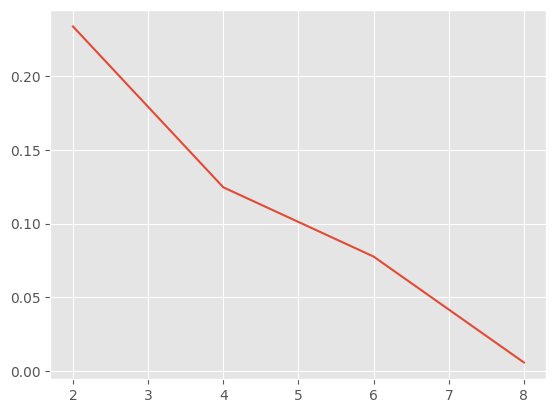

In [33]:
plt.plot(*zip(*count_silhouette))

* No Clear Elbow:
If the inertia plot doesn't show a clear elbow and the inertia decreases smoothly without a significant break point, it might be challenging to determine the optimal k based solely on this method.  
  
* Slight Elbow:
If there's a slight elbow, it suggests that adding more clusters beyond that point provides diminishing returns in terms of explaining the variance in the data.  
  
* Sharp Elbow:
If there's a sharp elbow, it indicates a more pronounced point where the addition of clusters is less beneficial. This is often considered a good candidate for the optimal number of clusters.  

  However, it's important to note that the elbow method has limitations, and the choice of k may not always be entirely clear-cut. It's often used as a heuristic rather than a strict rule. Other factors, such as domain knowledge, the context of the problem, and the specific characteristics of the data, should also be considered.

## Model Output
Now that we've decided on k=4 clusters, let's assign the cluster labels back to the original data, and make it interpretable!

In [34]:
km = KMeans(n_clusters=4)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters4 = km.labels_.tolist()
silhouette_k4 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:50000], clusters[0:50000])

CPU times: total: 172 ms
Wall time: 370 ms


In [35]:
df2_sample_dummies_concat_cities2_train.loc[:, "cluster_number"] = clusters4

In [36]:
df2_sample_dummies_concat_cities2_train.head()

group_id_6388  group_id_6510  group_id_8458  group_id_8940  \
605934           False          False          False          False   
828827           False          False          False          False   
519708           False          False          False          False   
65348            False          False          False          False   
1097394          False          False          False          False   

         group_id_12542  group_id_12907  group_id_14573  group_id_15324  \
605934            False           False           False           False   
828827            False           False           False           False   
519708            False           False           False           False   
65348             False           False           False           False   
1097394           False           False           False           False   

         group_id_17921  group_id_22211  ...  group_id_26292937  \
605934            False           False  ...              False   
828827            False           False  ...              False   
519708            False           False  ...              False   
65348             False           False  ...              False   
1097394           False           False  ...              False   

         group_id_26315851  group_id_26361954  cities__Chicago  \
605934               False              False            False   
828827               False              False            False   
519708               False              False             True   
65348                False              False            False   
1097394              False              False            False   

         cities__Chicago Ridge  cities__New York  cities__San Francisco  \
605934                   False              True                  False   
828827                   False             False                   True   
519708                   False             False                  False   
65348                    False             False                   True   
1097394                  False              True                  False   

         cities__South San Francisco  cities__West New York  cluster_number  
605934                         False                  False               2  
828827                         False                  False               1  
519708                         False                  False               3  
65348                          False                  False               1  
1097394                        False                  False               2  

[5 rows x 2718 columns]

In [37]:
df2_sample_dummies_concat_cities2_train["cluster_number"].value_counts()

cluster_number
2    2811
1    1293
3     819
0      77
Name: count, dtype: int64

## Tadah! We have a merged dataframe of members, clustered by their city and groups they're interested in, merged on what the group categories are (from the original groups df) and we can now export this and explore!

In [38]:
df2_sample.head()

member_id        bio           city country      hometown  \
605934     9683460  not_found       New York      us         Miami   
828827    11901097  not_found  San Francisco      us  Hangtown, CA   
519708     8789174  not_found        Chicago      us     not_found   
65348      2176350  not_found  San Francisco      us     not_found   
1097394   14108523  not_found       New York      us     not_found   

                      joined    lat                                    link  \
605934   2017-04-17 07:50:44  40.83   http://www.meetup.com/members/9683460   
828827   2010-04-15 17:47:41  37.75  http://www.meetup.com/members/11901097   
519708   2016-12-03 04:19:09  41.89   http://www.meetup.com/members/8789174   
65348    2016-01-08 06:34:53  37.72   http://www.meetup.com/members/2176350   
1097394  2016-07-30 14:51:07  40.75  http://www.meetup.com/members/14108523   

            lon           member_name state member_status  \
605934   -73.94  Shannon Clarke, Esq.    NY        active   
828827  -122.42          Scott Lepich    CA        active   
519708   -87.63                Kat =)    IL        active   
65348   -122.41     Jonathan El-Bizri    CA        active   
1097394  -73.99          Ken Nakagama    NY        active   

                     visited  group_id  
605934   2017-04-17 07:50:44  13389272  
828827   2014-04-03 22:08:07   1135107  
519708   2017-08-31 12:26:55  21367653  
65348    2016-03-10 22:26:46  18461006  
1097394  2017-02-04 01:47:07  18584199

In [39]:
df2_sample.loc[:, "clusters_number"] = clusters4

In [40]:
df2_sample.to_csv('members_cluster_group.csv')

In [41]:
!cp members_cluster_group.csv "gdrive/My Drive/Work/UBB 2023/02_Cursuri/Session #5/data/"

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [42]:
df2_sample.head()

member_id        bio           city country      hometown  \
605934     9683460  not_found       New York      us         Miami   
828827    11901097  not_found  San Francisco      us  Hangtown, CA   
519708     8789174  not_found        Chicago      us     not_found   
65348      2176350  not_found  San Francisco      us     not_found   
1097394   14108523  not_found       New York      us     not_found   

                      joined    lat                                    link  \
605934   2017-04-17 07:50:44  40.83   http://www.meetup.com/members/9683460   
828827   2010-04-15 17:47:41  37.75  http://www.meetup.com/members/11901097   
519708   2016-12-03 04:19:09  41.89   http://www.meetup.com/members/8789174   
65348    2016-01-08 06:34:53  37.72   http://www.meetup.com/members/2176350   
1097394  2016-07-30 14:51:07  40.75  http://www.meetup.com/members/14108523   

            lon           member_name state member_status  \
605934   -73.94  Shannon Clarke, Esq.    NY        active   
828827  -122.42          Scott Lepich    CA        active   
519708   -87.63                Kat =)    IL        active   
65348   -122.41     Jonathan El-Bizri    CA        active   
1097394  -73.99          Ken Nakagama    NY        active   

                     visited  group_id  clusters_number  
605934   2017-04-17 07:50:44  13389272                2  
828827   2014-04-03 22:08:07   1135107                1  
519708   2017-08-31 12:26:55  21367653                3  
65348    2016-03-10 22:26:46  18461006                1  
1097394  2017-02-04 01:47:07  18584199                2

In [43]:
df2_sample['city'].nunique()

6

In [44]:
df2_sample['group_id'].nunique()

2711